# ***Project Name - Global Terrorism Analysis***

# **Project Type - Exploratory Data Analysis**

# **Prepared By - Rohan Ambulkar**

# **Problem Statement**

Terrorism has been a significant threat to global security and stability in recent years. It has caused numerous casualties and economic losses, and has disrupted the lives of millions of people worldwide. To effectively combat terrorism, it is essential to understand its patterns, trends, and root causes. This requires comprehensive analysis of terrorism data from various sources,To achieve these objectives, we will use various data analysis techniques, such as statistical analysis,various bar plot, and data visualization. The results of this analysis will be used to inform policy decisions and develop effective strategies to combat global terrorism.The goal of this project is to analyze global terrorism data and provide insights into the patterns and trends of terrorist activities worldwide

# **Business Goal**

The goal of this project is to analyze global terrorism data and provide insights into the patterns and trends of terrorist activities worldwide

In [ ]:
# Importing Different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Mounting Google Drive
from google.colab import drive


In [ ]:
working_directory='/content/Global Terrorism Data.csv'

In [ ]:
# Loading the global terrorism dataset
data=pd.read_csv(working_directory,encoding='latin-1')

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in data.columns:
   print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

***Cleaning the Data***

In [ ]:
data.rename(columns={'iyear':'Year','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'attacktype','target1':'Target1','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'tartype','imonth':'Month','weapontype1_txt':'Weapon_Type','approxdate':'Date'},inplace=True)

In [ ]:
# Extracting new Data
data.head()

,eventid,Year,Month,Day,Date,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data=data[['Year','Month','Day','Country','region','city','Killed','Wounded','Group','tartype']]

In [ ]:
data.head()

,Year,Month,Day,Country,region,city,Killed,Wounded,Group,tartype
0,1970,7,2,Dominican Republic,2,Santo Domingo,1.0,0.0,MANO-D,Private Citizens & Property
1,1970,0,0,Mexico,1,Mexico city,0.0,0.0,23rd of September Communist League,Government (Diplomatic)
2,1970,1,0,Philippines,5,Unknown,1.0,0.0,Unknown,Journalists & Media
3,1970,1,0,Greece,8,Athens,NaN,NaN,Unknown,Government (Diplomatic)
4,1970,1,0,Japan,4,Fukouka,NaN,NaN,Unknown,Government (Diplomatic)


# ***Data Wrangling***


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'Killed'}>,
        <Axes: title={'center': 'Wounded'}>]], dtype=object)

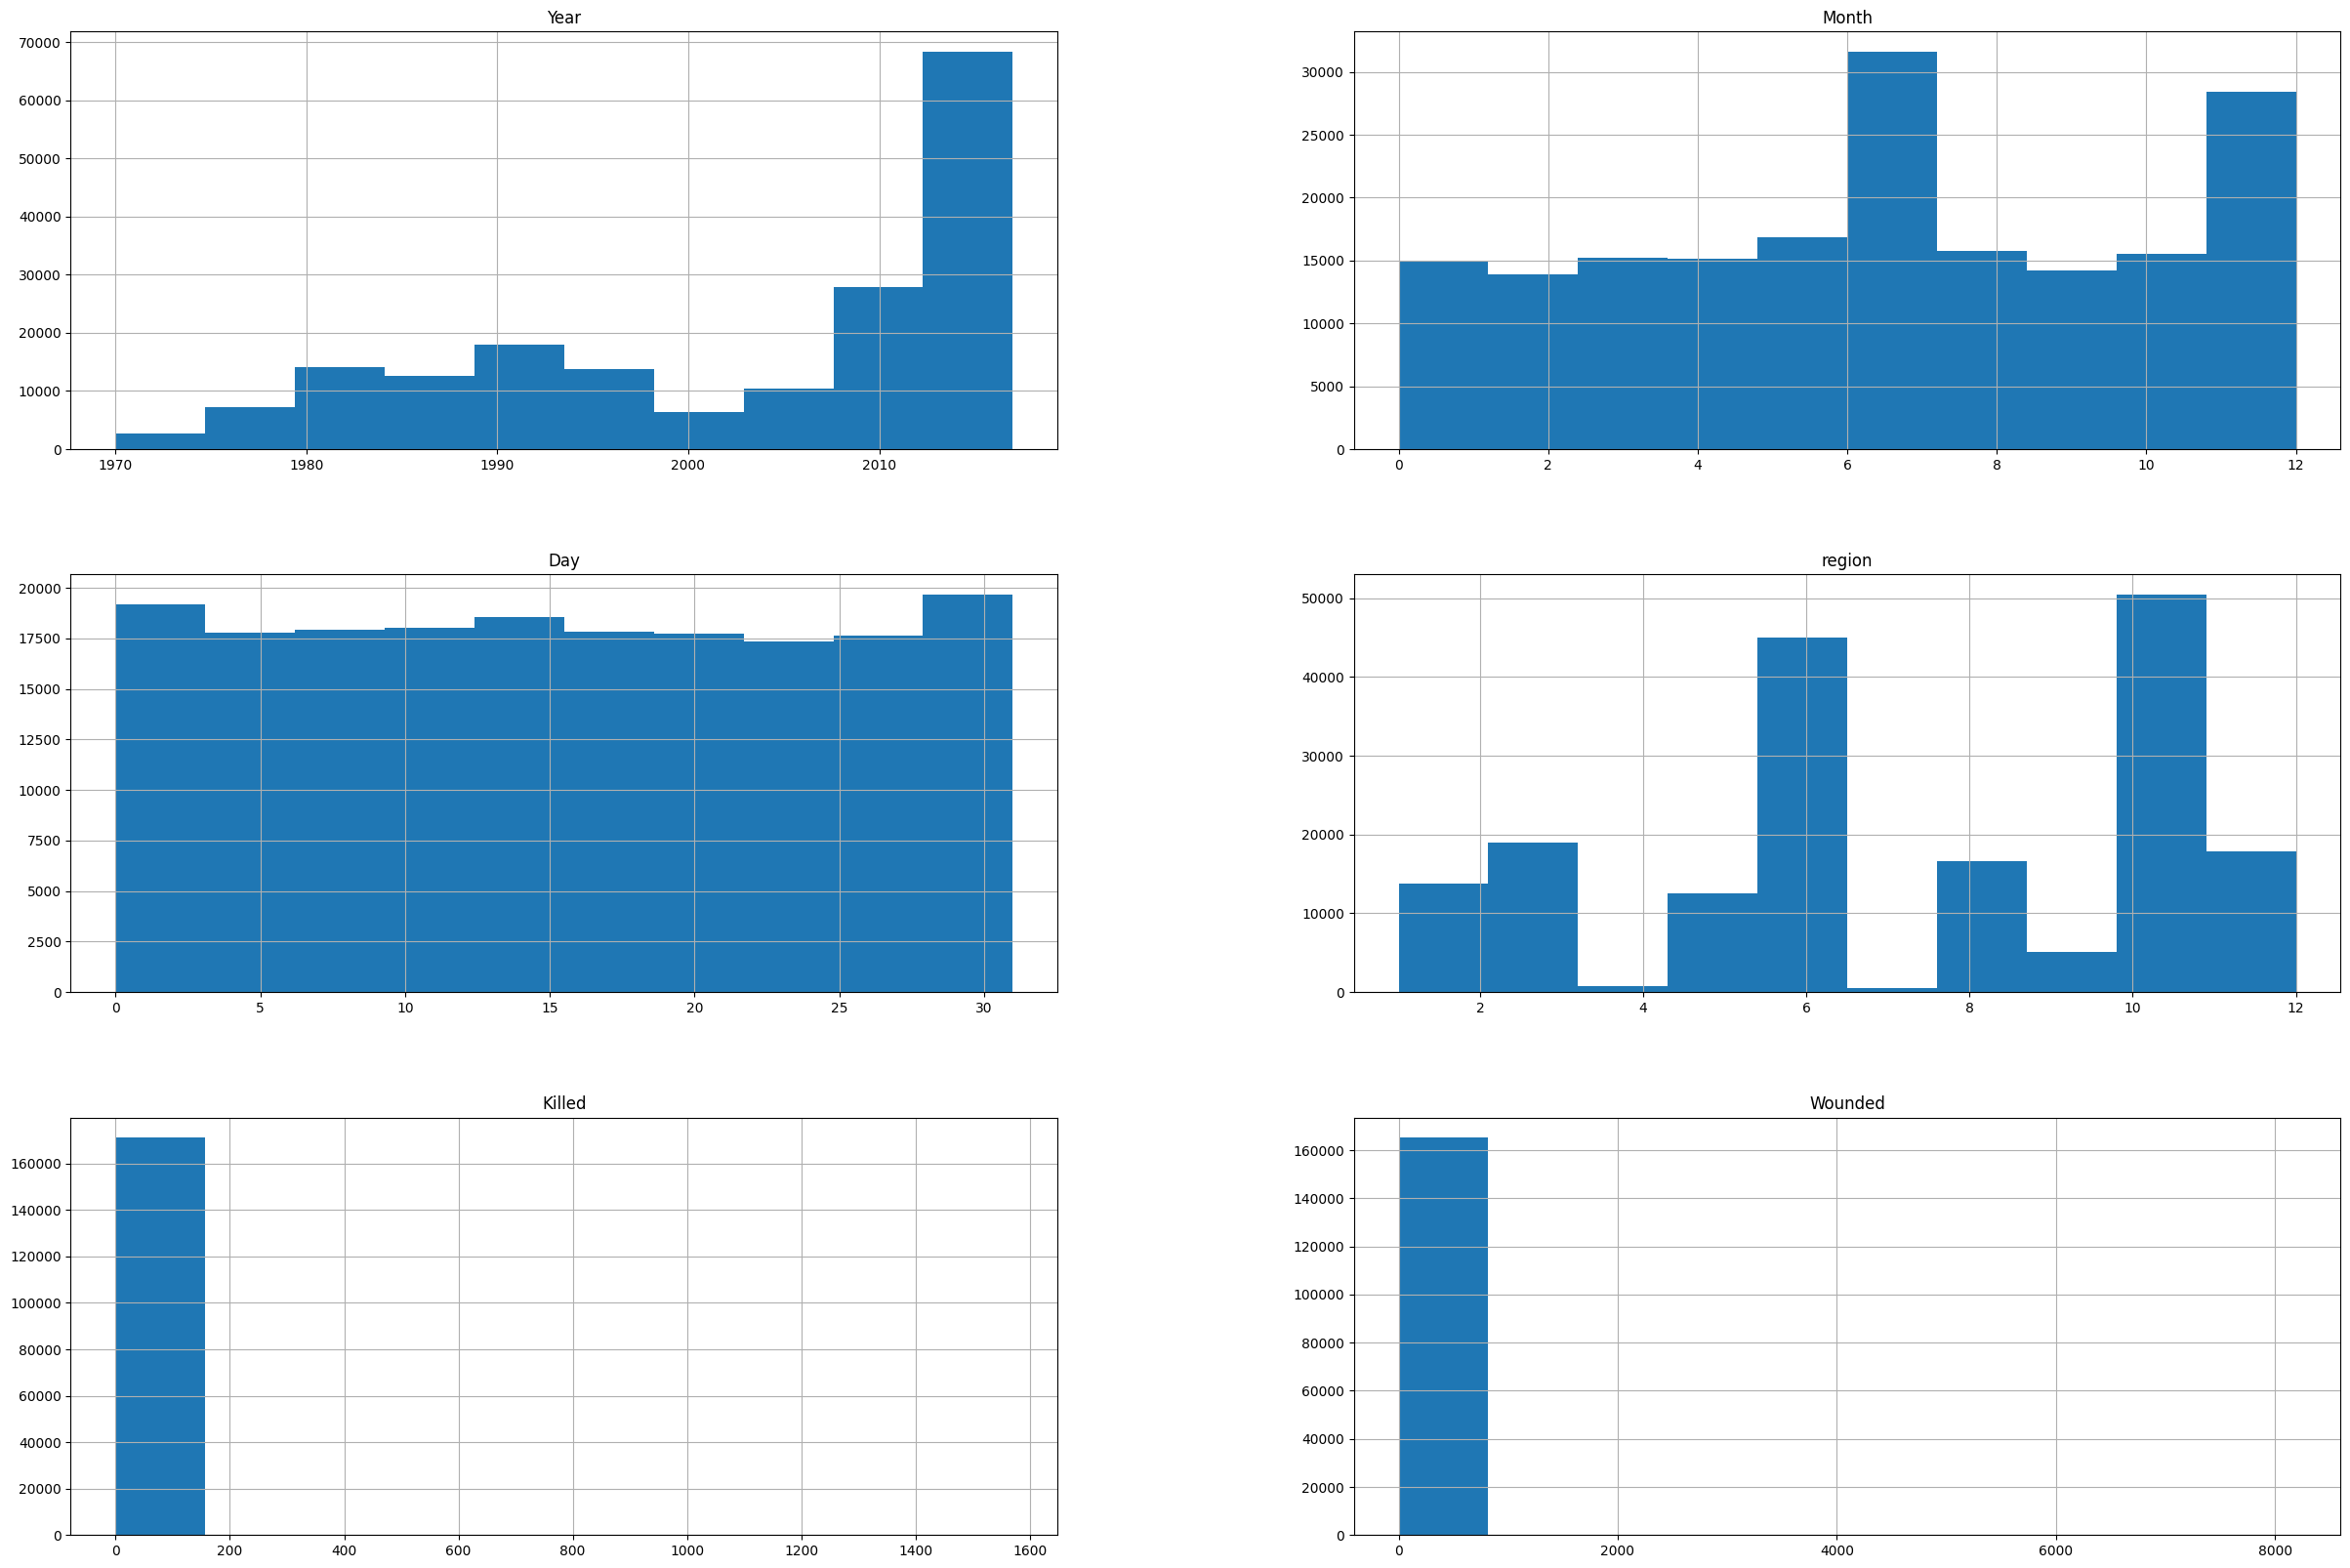

In [ ]:
# This represents the distribution of data on each series in the DataFrame
data.hist(figsize=(30,20))

In [ ]:
data.describe()

,Year,Month,Day,region,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,7.160938,2.403272,3.167668
std,13.259430,3.388303,8.814045,2.933408,11.545741,35.949392
min,1970.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,5.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,6.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,10.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,12.000000,1570.000000,8191.000000


# ***Correlation Analysis***

In [ ]:
# This shows how much related is one parameter to the other in the dataset
plt.figure(figsize=(20,10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Axes: >

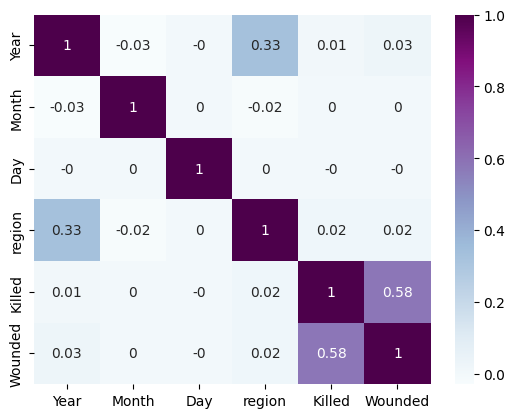

In [ ]:
sns.heatmap(np.round(data.corr(),2),annot=True,cmap='BuPu')

# Terrorist Attack as per Year

In [ ]:
Attacks=data['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attack'}).set_index('Year')
Attacks.head()


,Attack
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


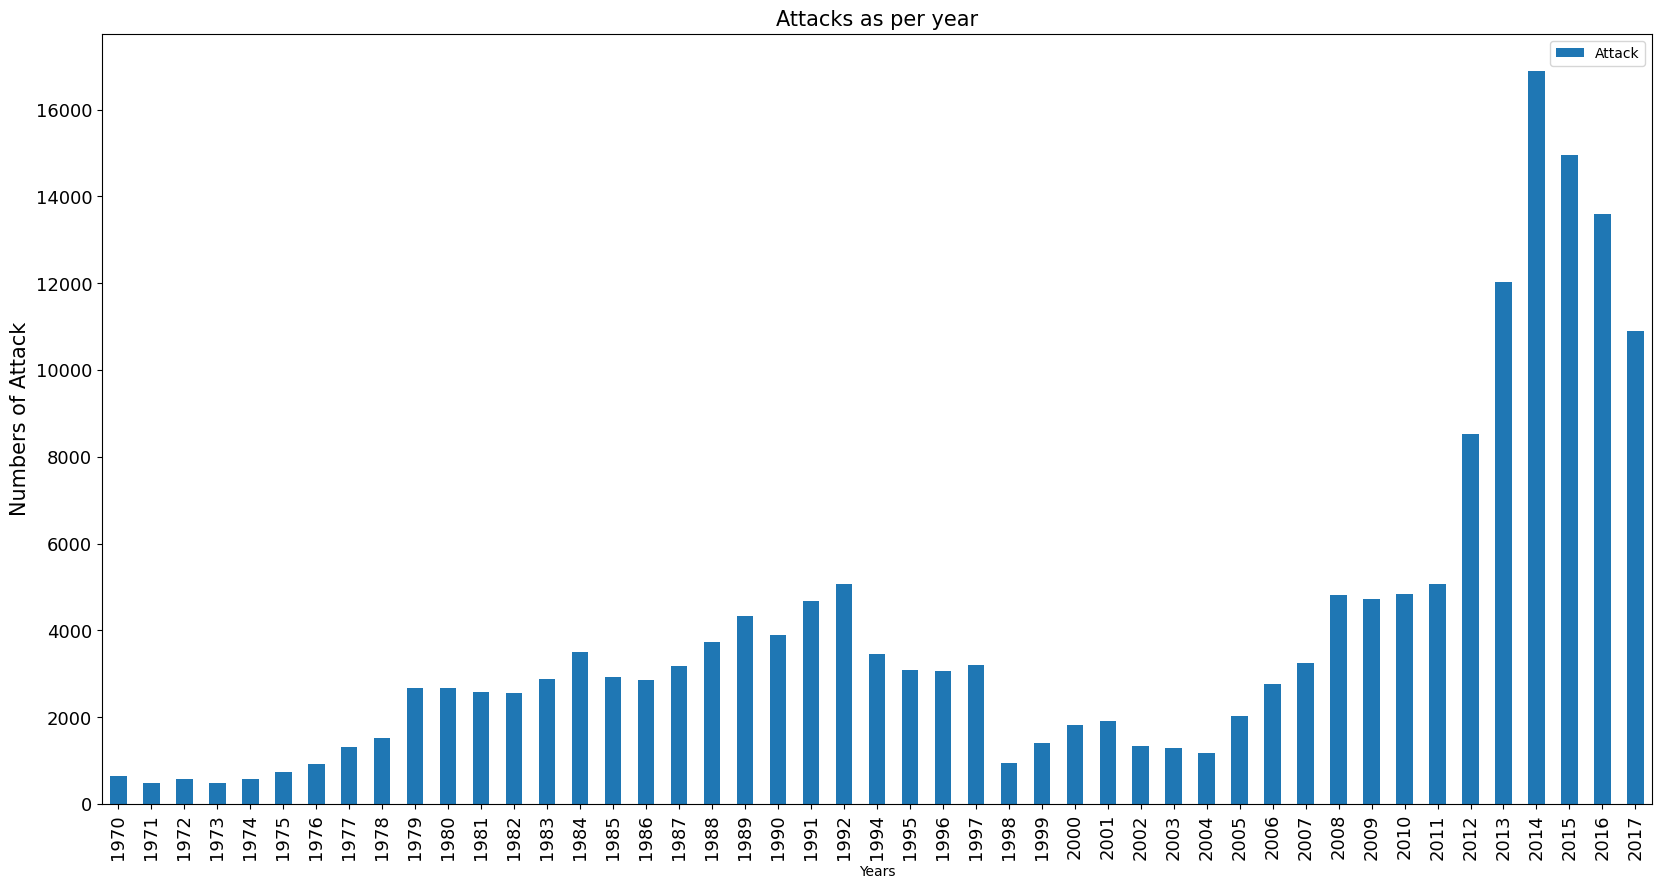

In [ ]:
# This shows in a particular year how many attacks were there.
Attacks.plot(kind='bar',figsize=(20,10),fontsize=13)
plt.title('Attacks as per year',fontsize=15)
plt.xlabel('Years',fontsize=10)
plt.ylabel('Numbers of Attack',fontsize=15)
plt.show()

From the above plot we came to know that 2014 and 2015 has a large number of terrorist activities

# **Number of attack in 1970 & 2017 and Also find the percentage the attacks have increased**

In [ ]:
Year = data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('so the number of attacks from 1970 has increased by',np.round(rate,0),'till 2017')


651 attacks happened in 1970 & 10900 attacks happened in 2017
so the number of attacks from 1970 has increased by 94.0 till 2017


## Terrorist Activities in Region as per Year

Text(0.5, 0, 'Year')

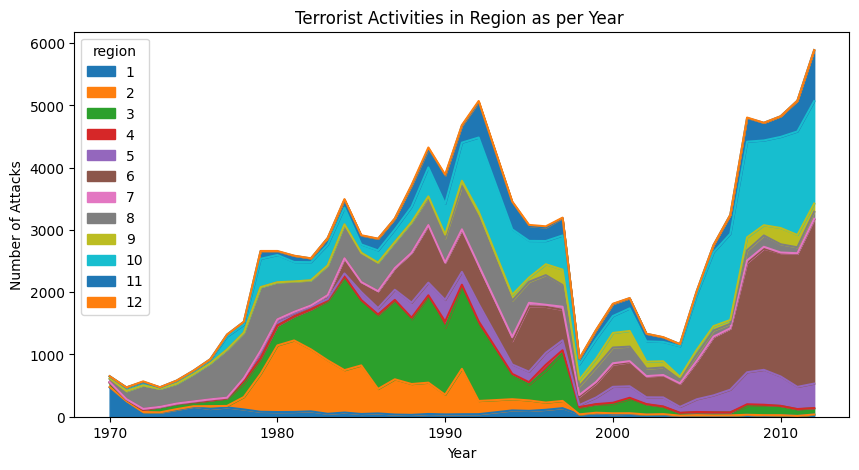

In [ ]:
# Here we have used Crosstab function
pd.crosstab(data.Year,data.region).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities in Region as per Year ')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')


# Total Number of Killing In  each Year




In [ ]:
Max_killed=data[['Year','Killed']].groupby('Year').sum()

In [ ]:
Max_killed.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


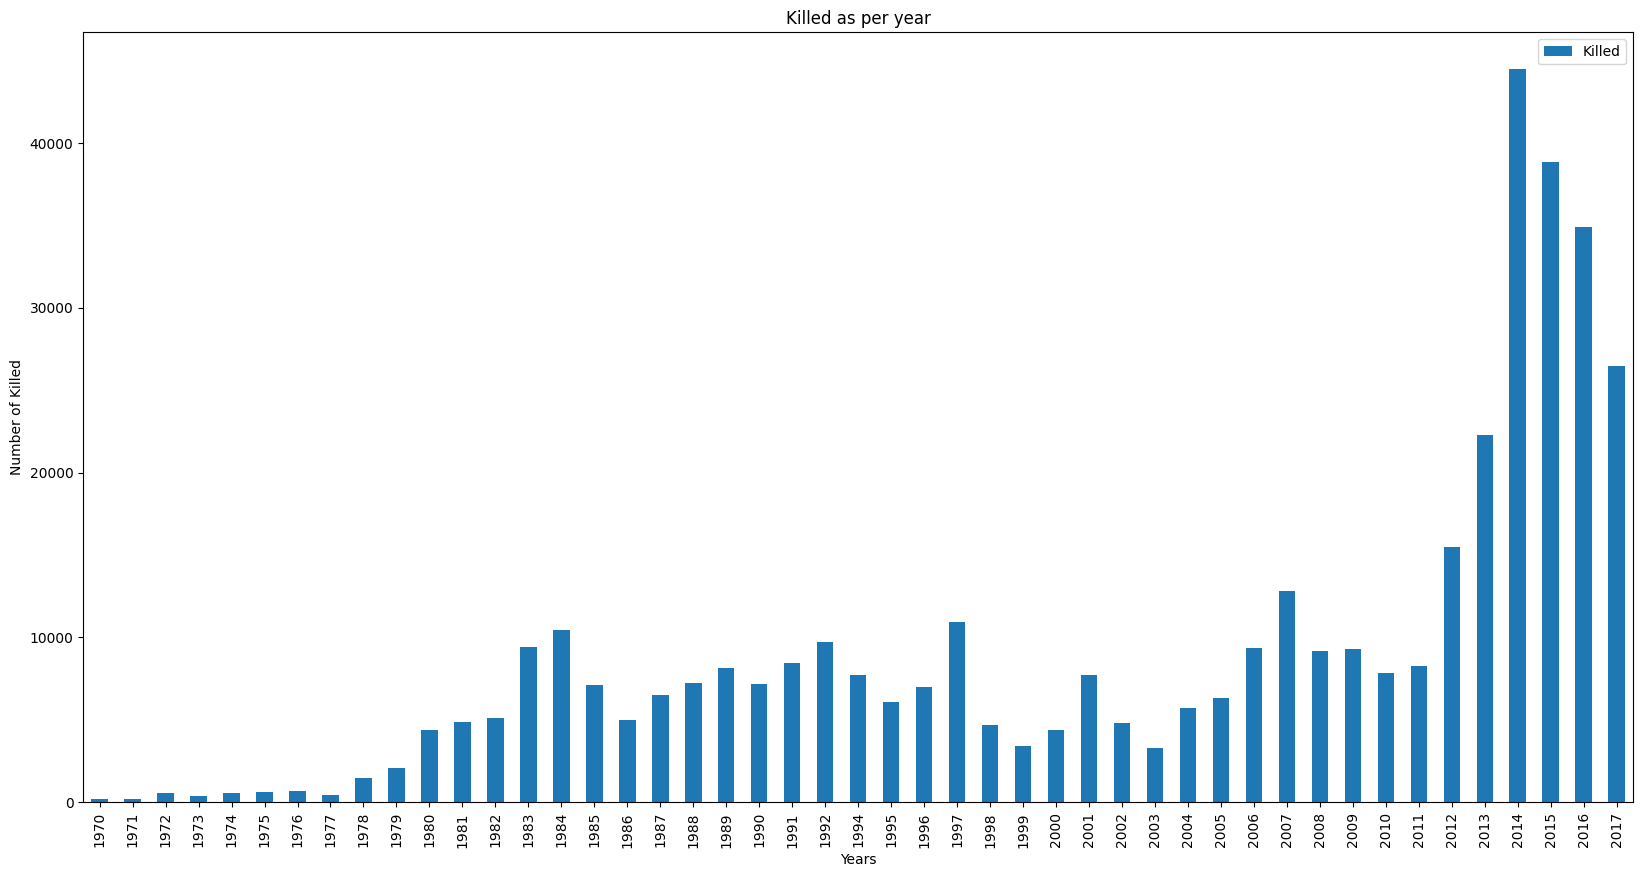

In [ ]:
Max_killed.plot(kind='bar',figsize=(20,10))
plt.title('Killed as per year')
plt.xlabel('Years')
plt.ylabel('Number of Killed')
plt.show()


# **Country Wise Attacks-Top 10**

In [ ]:
Country=data['Country'].value_counts().head(10)
Country


Iraq              8868
Colombia          7539
India             7347
Pakistan          6576
Peru              6051
El Salvador       5320
United Kingdom    4633
Afghanistan       4133
Philippines       3542
Spain             3231
Name: Country, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

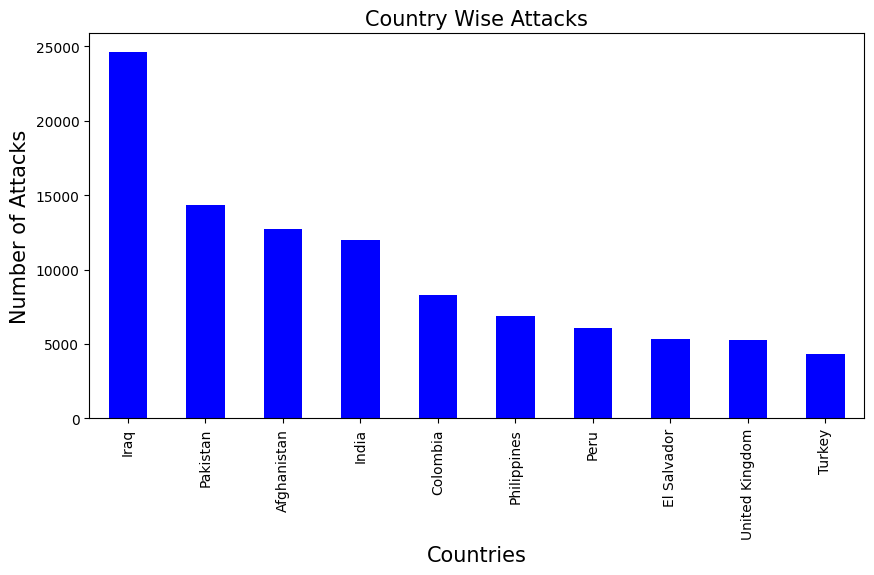

In [ ]:
Country.plot(kind='bar',color='blue',figsize=(10,5))
plt.title('Country Wise Attacks',fontsize=15)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show

# **City Wise Attacks- Top 10**

In [ ]:
City=data['city'].value_counts().head(10)
City

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

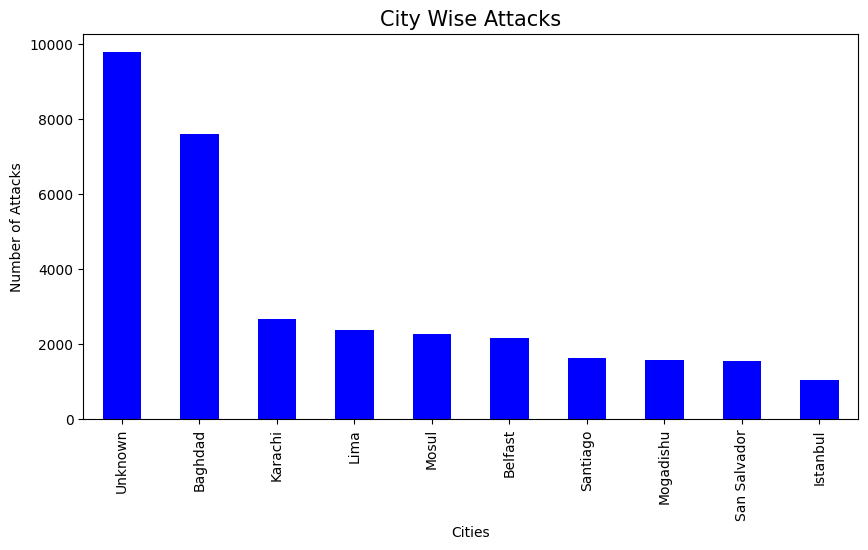

In [ ]:
City.plot(kind='bar',color='blue',figsize=(10,5))
plt.title('City Wise Attacks',fontsize=15)
plt.xlabel('Cities',fontsize=10)
plt.ylabel('Number of Attacks',fontsize=10)
plt.show()

# **Group+Country Wise- Top 10**

In [ ]:
Group_Country = data[['Group','Country']].value_counts().head(10)
Group_Country

Group                                             Country    
Unknown                                           Iraq           18520
                                                  Pakistan       10891
Taliban                                           Afghanistan     7423
Unknown                                           Afghanistan     4806
Islamic State of Iraq and the Levant (ISIL)       Iraq            4797
Shining Path (SL)                                 Peru            4541
Unknown                                           India           4263
Farabundo Marti National Liberation Front (FMLN)  El Salvador     3330
Unknown                                           Thailand        3007
Al-Shabaab                                        Somalia         2867
dtype: int64

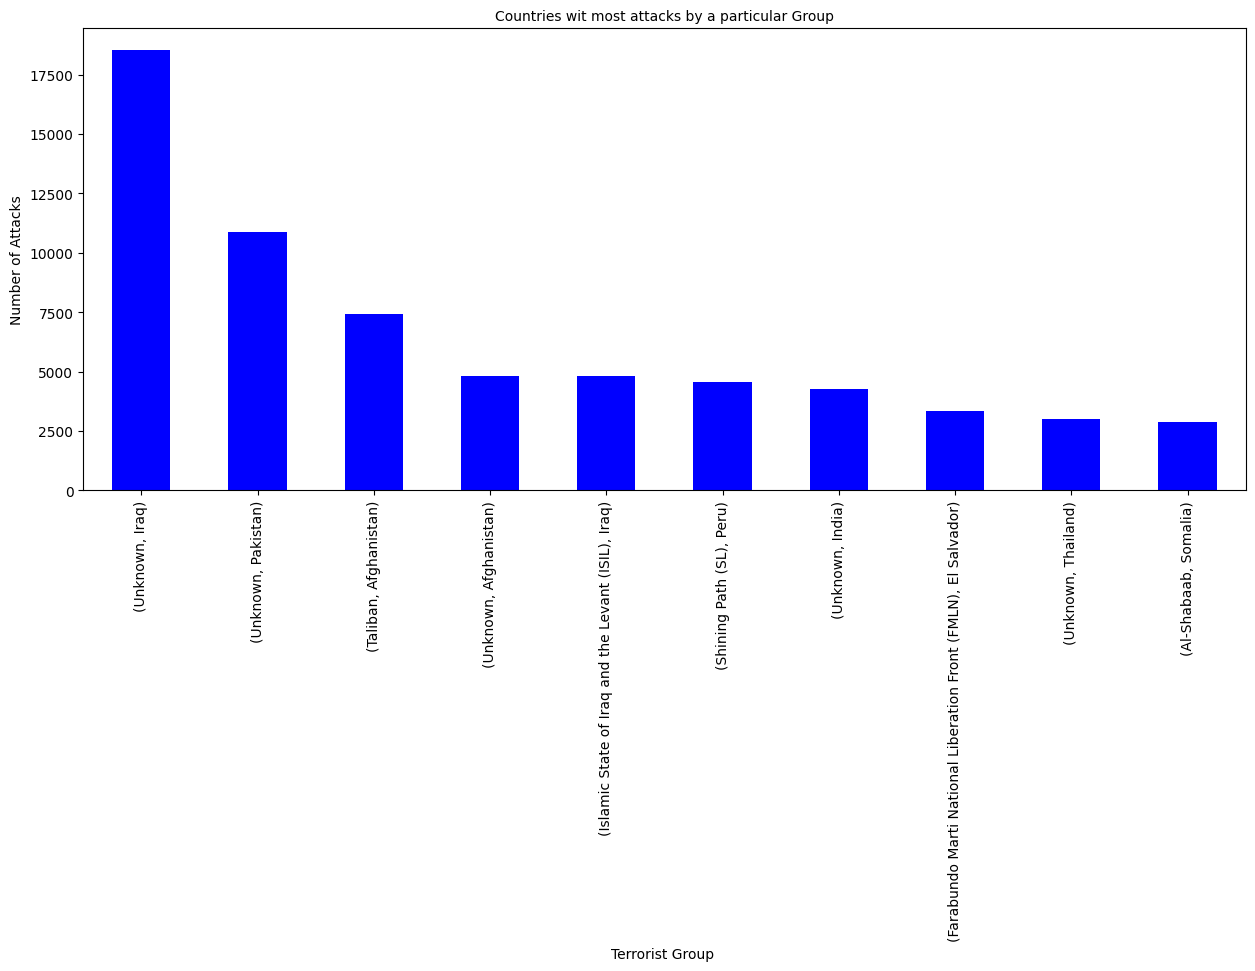

In [ ]:
Group_Country.plot(kind='bar',color='blue',figsize=(15,6))
plt.title('Countries wit most attacks by a particular Group',fontsize=10)
plt.xlabel('Terrorist Group ',fontsize=10)
plt.ylabel('Number of Attacks',fontsize=10)
plt.show()

# **Humanity Affected (World Wide)by Terrorist Attacks From 1970 to 2017**

1. Total killed due o Terrorist Atttacks


In [ ]:
Killed=data.loc[:,"Killed"].sum()
print('Total number of people got killed due to Terrorists Attacks from 1970 to 2017 across the world is :\n',Killed)

Total number of people got killed due to Terrorists Attacks from 1970 to 2017 across the world is :
 411868.0


2. Total Wounded Due To Terrorist

In [ ]:
Wounded=data.loc[:,'Wounded'].sum()
print('Total number of people got Wounded due to Terrorists Attacks from 1970 to 2017 across the world is :\n',Wounded)

Total number of people got Wounded due to Terrorists Attacks from 1970 to 2017 across the world is :
 523869.0


# Attacks By Terrorist Group

In [ ]:
Terrorist_Group=data['Group'].value_counts()[1:10]
Terrorist_Group


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

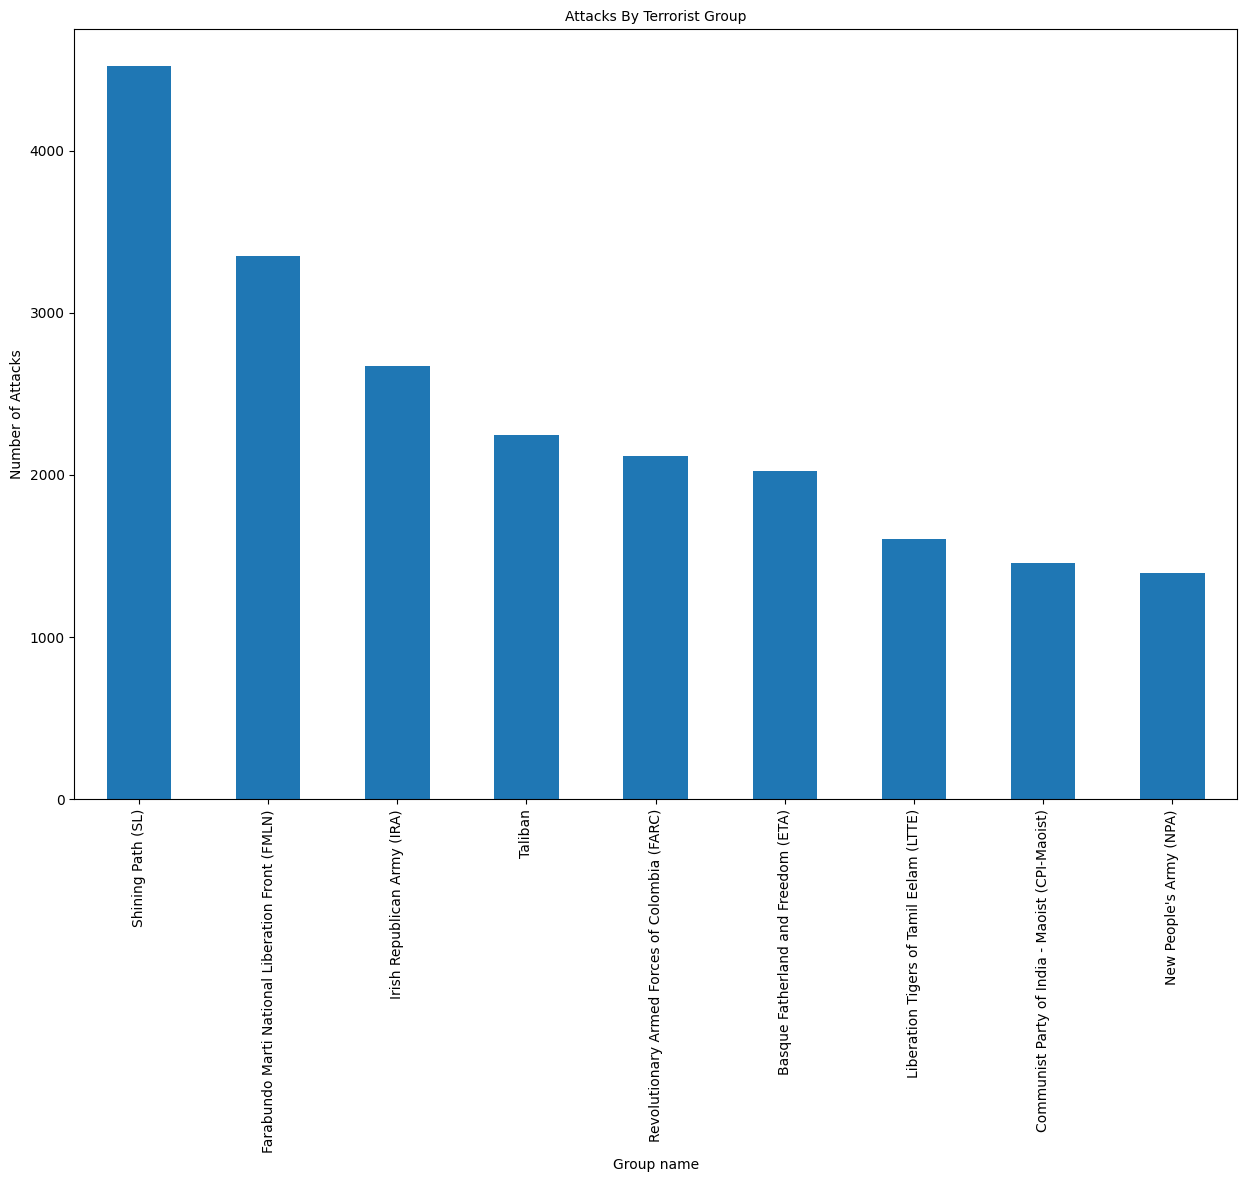

In [ ]:

Terrorist_Group.plot(kind='bar',figsize=(15,10))
plt.title('Attacks By Terrorist Group',fontsize=10)
plt.xlabel('Group name',fontsize=10)
plt.ylabel('Number of Attacks',fontsize=10)
plt.show()

# **The total number of attacks in each country using Globe**

In [ ]:
terror=data.groupby(['Country'],as_index=False).count()


In [ ]:
fig=px.choropleth(terror,locations='Country',locationmode='country names',color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

# **Country suffered the maximum attacks and country suffered minimum attacks**

In [ ]:
max_count=terror['Year'].max()
max_id=terror['Year'].idxmax()
max_name=terror['Country'][max_id]
min_count=terror['Year'].min()
min_id=terror['Year'].idxmin()
min_name=terror['Country'][min_id]

In [ ]:
print(max_name,'has suffered the maximum number of terror attacks of ',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of  8868
Andorra has suffered the minimum number of terror attacks of 1


# **The trend Before and after the War on Terror**

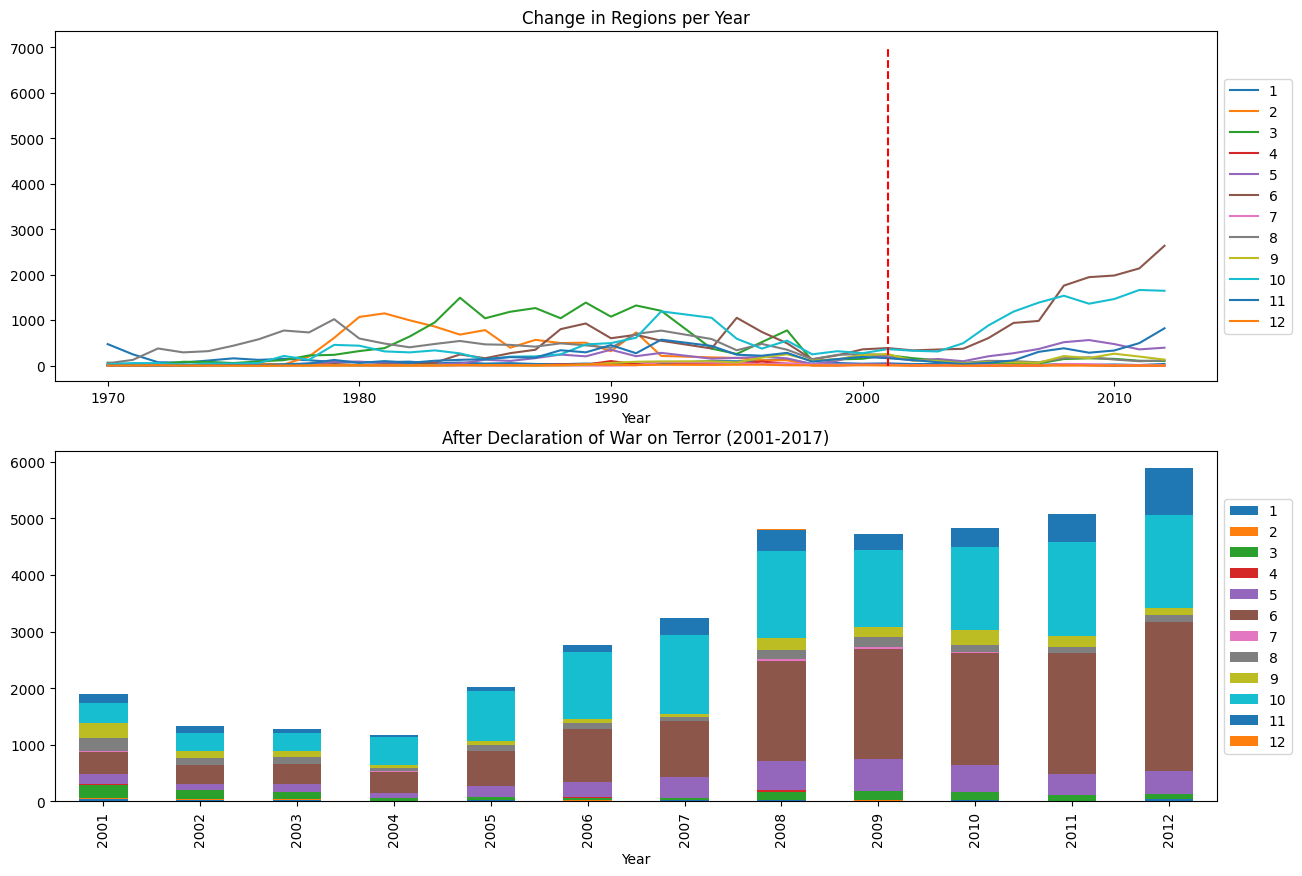

In [ ]:
after=data[data['Year']>=2001]
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0]=pd.crosstab(data.Year,data.region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor=(1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(after.Year,after.region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

# **Main Target Of The Attacks**

In [ ]:
print(data['tartype'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [ ]:
Target=data['tartype'].value_counts()
Target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: tartype, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

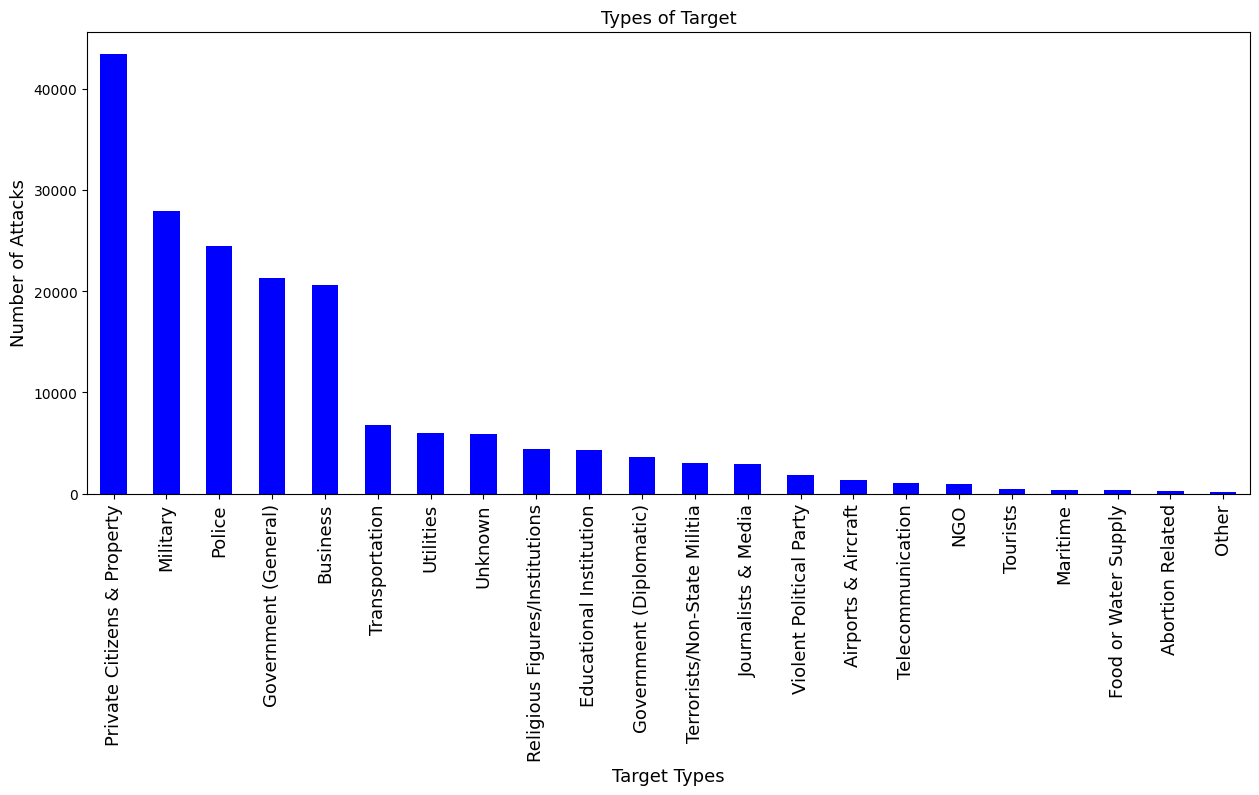

In [ ]:
Target.plot(kind='bar',color='blue',figsize=(15,6))
plt.title('Types of Target',fontsize=13)
plt.xlabel('Target Types',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Number of Attacks',fontsize=13)
plt.show

In [ ]:
ta=data[['tartype','Killed']].groupby('tartype').sum().sort_values(by='Killed',ascending=False)

In [ ]:
ta

,Killed
tartype,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


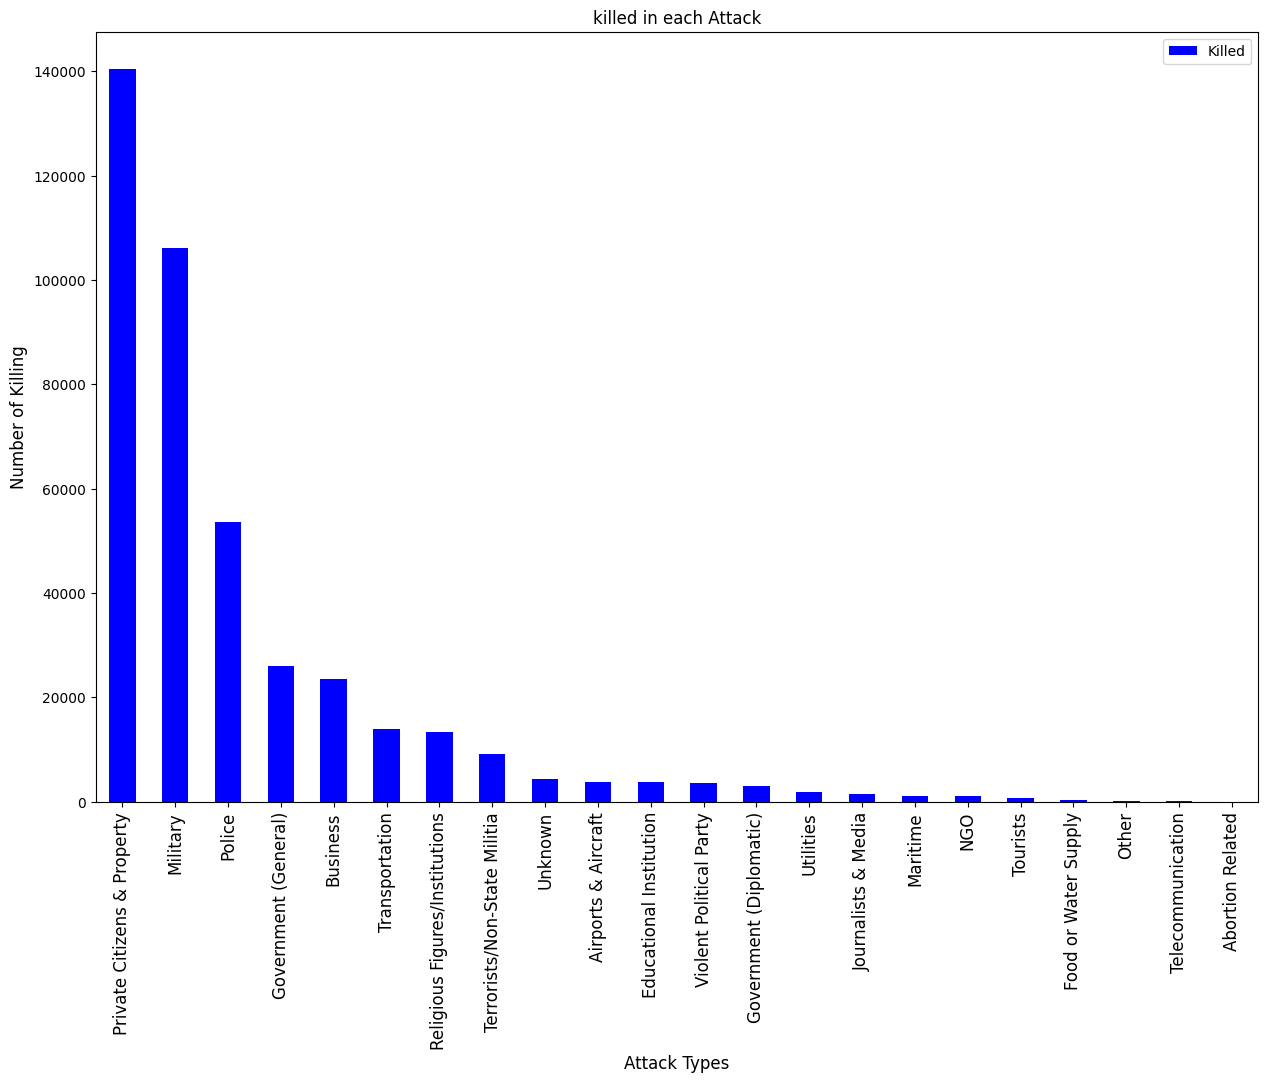

In [ ]:
ta.plot(kind='bar',color='blue',figsize=(15,10))
plt.title('killed in each Attack',fontsize=12)
plt.xlabel('Attack Types',fontsize=12)
plt.xticks(fontsize='12')
plt.ylabel('Number of Killing',fontsize=12)
plt.show()

# **Conclusion**

1) The data shows that 2014 was the year when the terrorists attacks were maximum
2)The percentage of attacks from 1970 to 2017 has increased by 94.0%.This means it has been increased continiously.
3) iraq is the Hotspot for terrorist attacks with 8868 total attacks.
4) Also we come to know that the maximum attacks were held by Taliban Group.
5) The total number of people that got Killed due to terrorist attacks from 1970 to 2017 across the world is 411868.0.
6) Andorra is the County with only one terrorist attack
7) Also we came to know that the main target for the attacks are private citizens & property, there killing number totals to 435111










